In this project my goal is to do some statistical and analytical observation on the IRIS classification dataset and finally do some supervised and unsupervised learning on the data. The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper "The use of multiple measurements in taxonomic problems" as an example of linear discriminant analysis   

In [2]:
#to print more than one outputs at a time
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

The iris flower dataset consists of 150 collected observations for different flower's charachteristics. The dataset contains four attributes. These four attributes help decide which Iris class does the flower belong to. The four attributes are sepal length, sepal width, petal length, and petal width; all in cm. The data set contains 3 classes Iris Setosa, Iris Versicolour, and Iris Virginica. For more info about the dataset, you can chek [this link](https://en.wikipedia.org/wiki/Iris_flower_data_set). The end target of the project will be to build a model that can predict, based on the four attributes, which class does the flower belong to.

In the first part of the project we will start by loading the data and cleaning up any problems within the data. 

# Step 1: Let's clean and load the data

In [3]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate 
import scipy.stats

#loading the dataset
df=pd.read_csv('iris_not_clean.data',sep='|',header=None,names=['sepal length','sepal width','petal length','petal width','iris'])

#Rows and columns in the file
df.shape

#total number of nulls in the file
df.isnull().sum().sum()

#rows containing nans
rows=df[df.isnull().any(axis=1)]
rows

#number of nans in each row
rows.isnull().sum(axis=1)

#number of nans in each column
df.isnull().sum()

df.head(5)

#fixing row 35
df.loc[36,['sepal length','sepal width','petal length','petal width']]=[4.9,3.1,1.5,0.2]
df.loc[36,:]

#fixing row 39
df.loc[40,['sepal width','petal length']]=[3.6,1.4]
df.loc[40,:]

df.head(5)

df1=pd.DataFrame(df)


(155, 5)

17

,sepal length,sepal width,petal length,petal width,iris
1,# this data is for IRIS,NaN,NaN,NaN,NaN
29,5.2,3.4,NaN,0.2,Iris-setosa
30,NaN,NaN,NaN,NaN,NaN
34,#is this correct?,NaN,NaN,NaN,NaN
46,NaN,3.2,2.1,NaN,NaN


1     4
29    1
30    5
34    4
46    3
dtype: int64

sepal length    2
sepal width     3
petal length    4
petal width     4
iris            4
dtype: int64

,sepal length,sepal width,petal length,petal width,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,# this data is for IRIS,NaN,NaN,NaN,NaN
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa


sepal length            4.9
sepal width             3.1
petal length            1.5
petal width             0.2
iris            Iris-setosa
Name: 36, dtype: object

sepal length            4.9
sepal width             3.6
petal length            1.4
petal width             0.1
iris            Iris-setosa
Name: 40, dtype: object

,sepal length,sepal width,petal length,petal width,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,# this data is for IRIS,NaN,NaN,NaN,NaN
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa


# Step 2: Now the data is neat and cleaned let us do some statistical exploring.

sepal length    5.829801
sepal width     3.053289
petal length    3.747020
petal width     1.192053
dtype: float64

sepal length    0.699973
sepal width     0.179724
petal length    3.113841
petal width     0.585136
dtype: float64

,sepal length,sepal width,petal length,petal width
count,151.000000,152.000000,151.000000,151.000000
mean,5.829801,3.053289,3.747020,1.192053
std,0.836644,0.423939,1.764608,0.764942
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


sepal length    5.834000
sepal width     3.050000
petal length    3.758000
petal width     1.198667
dtype: float64

sepal length    0.701991
sepal width     0.181174
petal length    3.116412
petal width     0.582414
dtype: float64

0.8230783463565978

-0.35185508063761106

0.9628049458718142

{'Iris-setosa': Int64Index([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
             18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 35, 36, 37,
             38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54],
            dtype='int64'),
 'Iris-versicolor': Int64Index([ 55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
              68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
              81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
              94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104],
            dtype='int64'),
 'Iris-virginica': Int64Index([105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
             118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
             131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
             144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154],
            dtype='int64')}

50

50

50

,sepal length,sepal width,petal length,petal width,iris
96,6.1,3.0,4.6,1.4,Iris-versicolor
68,6.1,2.9,4.7,1.4,Iris-versicolor
108,6.3,2.9,5.6,1.8,Iris-virginica
7,4.6,3.4,1.4,0.3,Iris-setosa
64,5.2,2.7,3.9,1.4,Iris-versicolor
32,4.8,3.1,1.6,0.2,Iris-setosa
28,5.2,3.5,1.5,0.2,Iris-setosa
39,5.5,3.5,1.3,0.2,Iris-setosa
104,5.7,2.8,4.1,1.3,Iris-versicolor
127,7.7,2.8,6.7,2.0,Iris-virginica


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002101FE5FDD8>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002101C79A438>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021020108400>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021020108438>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000210201EC9E8>,
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000210201ECA20>,
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000210201FFB38>,
      dtype=object)

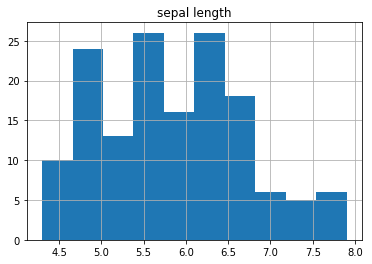

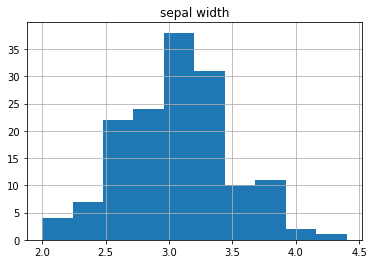

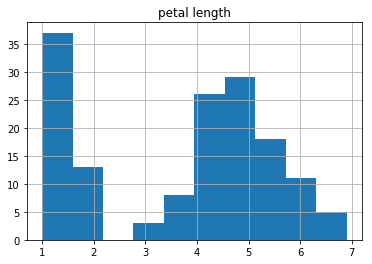

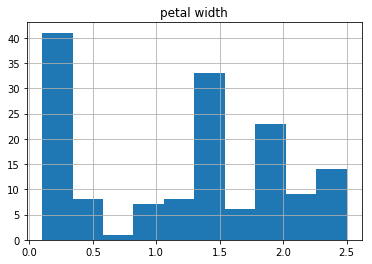

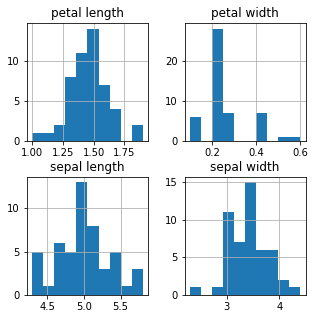

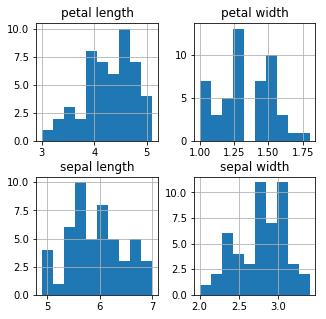

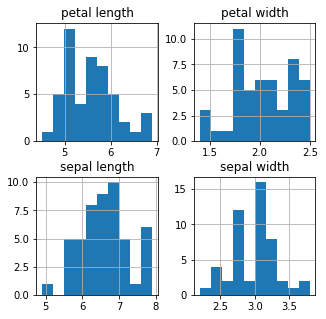

In [4]:
#mean and variance and summary
df1.loc[[1,34],['sepal length']]=[np.nan]
df1['sepal length']=pd.to_numeric(df1['sepal length'])
df1.mean()
df1.var()
df1.describe()

#dropping the nans
df2=df.drop([1,29,30,34,46])

#recalculating mean and variance
df2.mean()
df2.var()

#calculating the correlation between petal width and other three columns
df2['petal width'].corr(df2['sepal length'])
df2['petal width'].corr(df2['sepal width'])
df2['petal width'].corr(df2['petal length'])

#number of records for each class
df3=df2.groupby(df2['iris']).groups
df3
len(df3['Iris-setosa'])
len(df3['Iris-versicolor'])
len(df3['Iris-virginica'])

#20 random samples from the data
np.random.seed(1234)
seed=df2.sample(n=20)
seed

#histogram for all data attributes
df2.hist('sepal length')
df2.hist('sepal width')
df2.hist('petal length')
df2.hist('petal width')


#histogram grouped by features
df4=df2.groupby(df2['iris'])
for x in df4.groups:
    df4.get_group(name=x).hist(figsize=(5,5))



Insights:
1. We can observe that the mean sepal length is 5.82, mean sepal width is 3.05, mean petal length is 3.74 and mean petal width is 1.19
2. When we take a look at the variance of the dataset the variance of petal length is 3.11 which means that there is a large change among the numbers, Variance of sepal length is 0.69 and petal width is 0.58 which indicates there is small change among those numbers and the sepal width has the least variance.
3. When we take a look at the descriptive statistics we can observe that the number of entities for each attributes is the same for three of them and sepal length has 152 entities.
4. To get an accurate value we dropped the nulls and recalculated the mean and the variance
5. Now to find out the relationship between the attributes, lets find the corelation between petal width and other three columns. There is a good positive relationship between petal width and sepal length, petal width and petal length. But there is a negative relationship between petal width and sepal width.
6. Now its time to visualize the data, 

# Step 3: Pdf curve fitting for petal length 


<Figure size 576x576 with 0 Axes>

Text(0,0.5,'Density')

<Figure size 576x576 with 0 Axes>

(array([0.4180791 , 0.14689266, 0.        , 0.03389831, 0.09039548,
        0.29378531, 0.32768362, 0.20338983, 0.12429379, 0.05649718]),
 array([1.  , 1.59, 2.18, 2.77, 3.36, 3.95, 4.54, 5.13, 5.72, 6.31, 6.9 ]),
 <a list of 10 Patch objects>)

Text(0,0.5,'Density')

array([-0.87132703, -0.422164  ,  0.98486213,  0.0916698 , -0.16621239,
        0.71132291, -0.88196879, -0.32140819,  0.48456798,  0.7621959 ,
        0.70094294,  0.48371057,  0.68313302,  1.56212079, -0.58330278,
       -0.27167212,  1.41886006, -1.08946196,  1.06393196, -1.5259648 ,
       -0.2701974 ,  0.92511526, -0.03298404, -0.01656554,  0.84064289,
       -1.6643652 ,  0.195177  ,  0.5368008 , -0.11269004, -0.48819154,
       -0.55955629,  0.55348709, -1.59174525,  0.49919649, -0.37939864,
       -0.20439313,  0.78371608,  0.76355358,  0.32013832,  0.2278366 ,
        0.88915225,  1.96337644,  0.70670462, -0.89730644, -2.02246741,
        1.99154794, -1.67511842,  1.26996666,  0.85678894, -0.32027566,
        0.76268139, -0.78925058,  1.23926598, -0.46015556,  0.76717147,
        1.05287751, -0.05028506,  2.44027931,  0.57401914,  0.87811918,
       -0.38858187,  0.03290831,  1.45179994, -0.70621571, -2.02018753,
       -0.22507331, -0.77313012,  0.45309254,  0.66111033, -0.61

array([[ 5.15362866],
       [ 4.32903655],
       [ 1.69122686],
       [ 6.80783815],
       [ 3.29035916],
       [ 5.68813745],
       [ 1.58216068],
       [ 1.50243657],
       [ 4.777627  ],
       [ 0.756387  ],
       [ 1.85896922],
       [ 1.27335461],
       [ 4.78905055],
       [ 2.49112964],
       [ 5.23314522],
       [ 4.10284847],
       [ 4.06154962],
       [ 4.19381296],
       [ 2.19765325],
       [ 4.63535744],
       [ 6.92720111],
       [ 4.38520745],
       [ 4.65123282],
       [ 4.41526653],
       [ 0.97213761],
       [ 1.29347591],
       [ 5.23167804],
       [ 1.61495564],
       [ 4.73736641],
       [ 1.11523217],
       [ 4.25887573],
       [ 1.92926055],
       [ 4.22140127],
       [ 4.18214162],
       [ 1.15734599],
       [-0.15370486],
       [ 5.89866603],
       [ 1.340882  ],
       [ 1.31566793],
       [ 0.6798263 ],
       [ 2.558702  ],
       [ 5.37026028],
       [ 1.23210945],
       [ 4.25031209],
       [ 5.33320041],
       [ 5

3.6872692179487174

3.7580000000000027

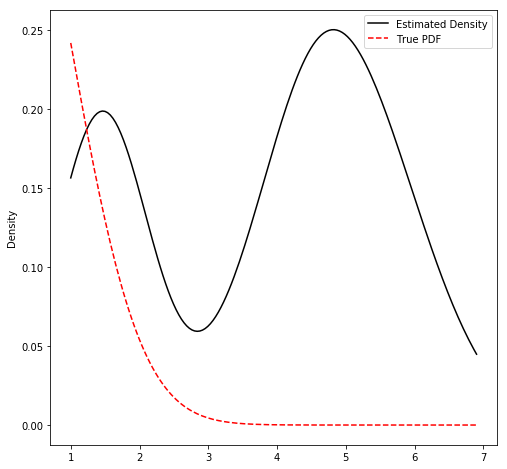

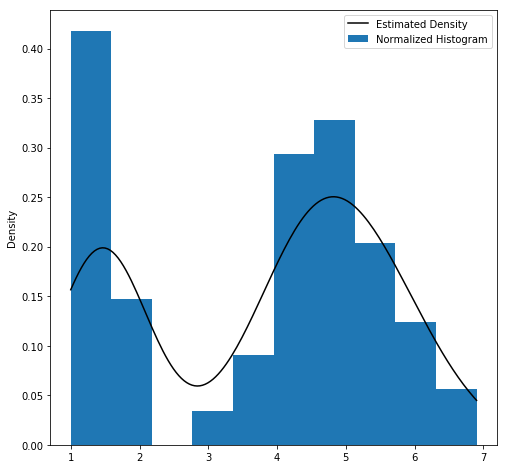

In [4]:
#pdf fitting curve for petal length
x1=df2['petal length']
xs=np.linspace(x1.min(),x1.max(),155)
kde1= scipy.stats.gaussian_kde(df2['petal length'])
plt.figure(figsize=(8,8))
plt.plot(xs, kde1(xs), 'k-', label="Estimated Density")  
plt.plot(xs, scipy.stats.norm.pdf(xs), 'r--', label="True PDF")  
plt.ylabel('Density')
plt.legend()

#histogram and pdf on the same curve
plt.figure(figsize=(8,8))
plt.hist(x1, density=True, label='Normalized Histogram')
plt.plot(xs, kde1(xs), 'k-', label="Estimated Density")  
plt.ylabel('Density')
plt.legend()
np.random.normal(kde1(xs))

#generate 500 samples using the estimated pdf petal length
prob_val = kde1(xs)
new_samp=kde1.resample(500)
new_samp_500 = new_samp.T
new_samp_500

#mean of the new samples and mean of the data
new_samp_500.mean()
df2['petal length'].mean()


# Step 4: Principle Component Analysis to reduce the number of attributes

array([[-2.67851311e+00,  3.51469651e-01, -2.78232974e-02,
        -4.19579973e-03],
       [-2.71212037e+00, -1.43049758e-01, -2.13931289e-01,
        -1.02607795e-01],
       [-2.88692493e+00, -1.11543714e-01,  1.46122631e-02,
        -2.37498093e-02],
       [-2.74468600e+00, -2.86414646e-01,  2.72144924e-02,
         7.12734905e-02],
       [-2.72317042e+00,  3.58115681e-01,  9.02425514e-02,
         5.92235192e-02],
       [-2.27218785e+00,  7.68834242e-01,  1.71966489e-01,
         2.39222285e-02],
       [-2.81825506e+00, -5.85005906e-02,  2.55077816e-01,
         4.44205213e-02],
       [-2.62176410e+00,  1.94812704e-01, -2.28092139e-02,
         4.28468478e-02],
       [-2.88765778e+00, -5.45086583e-01,  1.44782220e-02,
         2.14168287e-02],
       [-2.67038409e+00, -8.07858314e-02, -2.00514791e-01,
         5.29598217e-02],
       [-2.49884221e+00,  6.76040055e-01, -7.28329203e-02,
         1.44202050e-02],
       [-2.60967241e+00,  4.48017873e-02,  1.00270718e-01,
      

array([0.9265206 , 0.05106678, 0.017199  , 0.00521361])

(150, 4)

<BarContainer object of 4 artists>

array([0.9265206 , 0.05106678, 0.017199  ])

(150, 3)

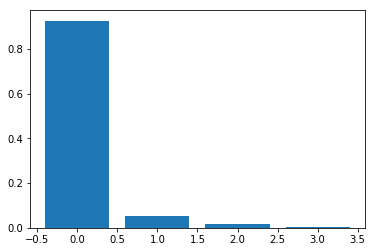

In [5]:
#PCA on the IRIS data
df5=df2.drop(columns='iris')
from sklearn.decomposition import PCA
PC1 = PCA()
PC1.fit_transform(df5)
PC1.explained_variance_ratio_
PC1.fit_transform(df5).shape

#bar plot
plt.bar(np.arange(0,4),PC1.explained_variance_ratio_)

#reducing the number of attributes to 1
reduced_data = PCA(n_components=3)
F=reduced_data.fit_transform(df5)
reduced_data.explained_variance_ratio_
reduced_data.fit_transform(df5).shape




# Step 5: Machine Learning using of supervised and non supervised learning

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

[[-2.64705158  0.18809832  0.01460689]
 [ 0.67633857 -0.30866612 -0.04458351]
 [ 2.37946283  0.25611535  0.05352193]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


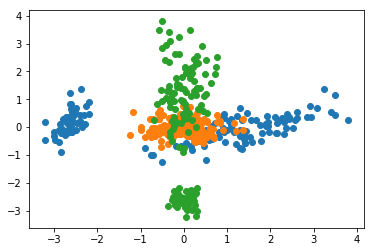

In [7]:
#using Kmeans to divide into clusters
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3)
kmeans.fit(F)
print(kmeans.cluster_centers_)
print(kmeans.labels_)
plt.scatter(data1,data2,cmap='rainbow')
plt.scatter(data2,data3,cmap='rainbow')
plt.scatter(data3,data1,cmap='rainbow')

In [8]:
#divide dataset to 80% training and 20% validation
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(data,kmeans.labels_,test_size=0.20)

In [9]:
#build a logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
#training accuracy
predictions=lr.predict(X_train)
score=lr.score(X_train,y_train)
print(score)

0.9333333333333333


In [11]:
#validation accuracy
predictions1=lr.predict(X_test)
score1=lr.score(X_test,y_test)
print(score1)

0.9333333333333333


In [12]:
#confusion matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,predictions1)
cm


array([[ 7,  0,  0],
       [ 0, 12,  2],
       [ 0,  0,  9]], dtype=int64)